In [1]:
# df plot
import cufflinks as cf 
import plotly.plotly as py 
import matplotlib.pyplot as plt 
import seaborn as sns 

# warnings 
import warnings ; warnings.filterwarnings("ignore")

# style
plt.style.use("ggplot")
cf.go_offline()

import matplotlib
from matplotlib import font_manager, rc 
import platform 

font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font",family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
import pandas as pd 
import numpy as np 
sales = pd.read_excel("./data_train/sales_train_final.xlsx",index_col = [0])
sales.head()

,방송일시,노출(분),상품명,상품군,판매단가,취급액,month,day,hour,minute,...,호우주의보,상품군-중,viewrate1,viewrate2,viewrate3,ec_credit,retail_index,sales_by_quarter,coincident_index,w_prime
0,2019-01-01 06:00:00,20.0,테이트 남성 셀린니트3종,6,39900,2099000,1,1,6,0,...,0,17,0,0,0,52039328,109.8,117699,100.2,4.771683e+07
1,2019-01-01 06:00:00,20.0,테이트 여성 셀린니트3종,6,39900,4371000,1,1,6,0,...,0,17,0,0,0,52039328,109.8,117699,100.2,4.771683e+07
2,2019-01-01 06:20:00,20.0,테이트 남성 셀린니트3종,6,39900,3262000,1,1,6,20,...,0,17,0,0,0,52039328,109.8,117699,100.2,4.771683e+07
3,2019-01-01 06:20:00,20.0,테이트 여성 셀린니트3종,6,39900,6955000,1,1,6,20,...,0,17,0,0,0,52039328,109.8,117699,100.2,4.771683e+07
4,2019-01-01 06:40:00,20.0,테이트 남성 셀린니트3종,6,39900,6672000,1,1,6,40,...,0,17,0,0,0,52039328,109.8,117699,100.2,4.771683e+07


In [3]:
sales.drop(["상품명","방송일시"],axis=1,inplace=True)

## 설명변수와 타겟변수를 분리, 학습 데이터와 평가 데이터 분리 

In [4]:
from sklearn.model_selection import train_test_split

feature_columns = list(sales.columns.difference(["취급액"]))
X = sales[feature_columns].values
y = sales["취급액"].values

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.1, random_state = 42)

print(train_X.shape,train_y.shape,test_X.shape,test_y.shape)

(33631, 34) (33631,) (3737, 34) (3737,)


## 기본값으로 lgbm 모델에 적용

In [5]:
import lightgbm as lgb 
import time 

lgbm_wrapper = lgb.LGBMRegressor(n_estimators = 500)
evals =[(test_X,test_y)]

lgbm_wrapper.fit(train_X,train_y,early_stopping_rounds =300, eval_metric = "mape", eval_set = evals, verbose =True)

[1]	valid_0's mape: 1.06192e+06	valid_0's l2: 3.66606e+14
Training until validation scores don't improve for 300 rounds
[2]	valid_0's mape: 1.01453e+06	valid_0's l2: 3.41277e+14
[3]	valid_0's mape: 970147	valid_0's l2: 3.20882e+14
[4]	valid_0's mape: 931944	valid_0's l2: 3.03714e+14
[5]	valid_0's mape: 897765	valid_0's l2: 2.89195e+14
[6]	valid_0's mape: 863626	valid_0's l2: 2.76097e+14
[7]	valid_0's mape: 837093	valid_0's l2: 2.65537e+14
[8]	valid_0's mape: 802964	valid_0's l2: 2.55257e+14
[9]	valid_0's mape: 772385	valid_0's l2: 2.47397e+14
[10]	valid_0's mape: 748636	valid_0's l2: 2.40367e+14
[11]	valid_0's mape: 724859	valid_0's l2: 2.32572e+14
[12]	valid_0's mape: 703326	valid_0's l2: 2.27411e+14
[13]	valid_0's mape: 684666	valid_0's l2: 2.22346e+14
[14]	valid_0's mape: 665259	valid_0's l2: 2.1837e+14
[15]	valid_0's mape: 648885	valid_0's l2: 2.12653e+14
[16]	valid_0's mape: 631841	valid_0's l2: 2.08569e+14
[17]	valid_0's mape: 614666	valid_0's l2: 2.04473e+14
[18]	valid_0's mape:

[168]	valid_0's mape: 333027	valid_0's l2: 1.23759e+14
[169]	valid_0's mape: 333040	valid_0's l2: 1.23761e+14
[170]	valid_0's mape: 332936	valid_0's l2: 1.23614e+14
[171]	valid_0's mape: 332664	valid_0's l2: 1.23494e+14
[172]	valid_0's mape: 332465	valid_0's l2: 1.23437e+14
[173]	valid_0's mape: 330745	valid_0's l2: 1.23349e+14
[174]	valid_0's mape: 330838	valid_0's l2: 1.22958e+14
[175]	valid_0's mape: 330697	valid_0's l2: 1.22907e+14
[176]	valid_0's mape: 330848	valid_0's l2: 1.22758e+14
[177]	valid_0's mape: 330473	valid_0's l2: 1.22744e+14
[178]	valid_0's mape: 330469	valid_0's l2: 1.22736e+14
[179]	valid_0's mape: 330523	valid_0's l2: 1.2247e+14
[180]	valid_0's mape: 330386	valid_0's l2: 1.22292e+14
[181]	valid_0's mape: 329783	valid_0's l2: 1.22116e+14
[182]	valid_0's mape: 327814	valid_0's l2: 1.2201e+14
[183]	valid_0's mape: 326972	valid_0's l2: 1.21917e+14
[184]	valid_0's mape: 326962	valid_0's l2: 1.21854e+14
[185]	valid_0's mape: 326728	valid_0's l2: 1.21785e+14
[186]	valid_

[318]	valid_0's mape: 297233	valid_0's l2: 1.10089e+14
[319]	valid_0's mape: 296515	valid_0's l2: 1.10067e+14
[320]	valid_0's mape: 296405	valid_0's l2: 1.10017e+14
[321]	valid_0's mape: 296383	valid_0's l2: 1.1003e+14
[322]	valid_0's mape: 296424	valid_0's l2: 1.1e+14
[323]	valid_0's mape: 296191	valid_0's l2: 1.09953e+14
[324]	valid_0's mape: 295696	valid_0's l2: 1.09927e+14
[325]	valid_0's mape: 295768	valid_0's l2: 1.09829e+14
[326]	valid_0's mape: 295281	valid_0's l2: 1.09838e+14
[327]	valid_0's mape: 295030	valid_0's l2: 1.0979e+14
[328]	valid_0's mape: 294935	valid_0's l2: 1.09766e+14
[329]	valid_0's mape: 294858	valid_0's l2: 1.09707e+14
[330]	valid_0's mape: 294121	valid_0's l2: 1.09704e+14
[331]	valid_0's mape: 293928	valid_0's l2: 1.09702e+14
[332]	valid_0's mape: 293803	valid_0's l2: 1.09638e+14
[333]	valid_0's mape: 293606	valid_0's l2: 1.09632e+14
[334]	valid_0's mape: 293115	valid_0's l2: 1.0958e+14
[335]	valid_0's mape: 293181	valid_0's l2: 1.0944e+14
[336]	valid_0's ma

[474]	valid_0's mape: 277419	valid_0's l2: 1.03594e+14
[475]	valid_0's mape: 277445	valid_0's l2: 1.03553e+14
[476]	valid_0's mape: 277429	valid_0's l2: 1.0353e+14
[477]	valid_0's mape: 277696	valid_0's l2: 1.03531e+14
[478]	valid_0's mape: 277680	valid_0's l2: 1.03493e+14
[479]	valid_0's mape: 277549	valid_0's l2: 1.03481e+14
[480]	valid_0's mape: 277305	valid_0's l2: 1.03436e+14
[481]	valid_0's mape: 277391	valid_0's l2: 1.03413e+14
[482]	valid_0's mape: 277290	valid_0's l2: 1.03404e+14
[483]	valid_0's mape: 277395	valid_0's l2: 1.03351e+14
[484]	valid_0's mape: 277095	valid_0's l2: 1.03342e+14
[485]	valid_0's mape: 276967	valid_0's l2: 1.03319e+14
[486]	valid_0's mape: 276747	valid_0's l2: 1.03287e+14
[487]	valid_0's mape: 276679	valid_0's l2: 1.03249e+14
[488]	valid_0's mape: 276672	valid_0's l2: 1.03277e+14
[489]	valid_0's mape: 276455	valid_0's l2: 1.03252e+14
[490]	valid_0's mape: 276395	valid_0's l2: 1.03236e+14
[491]	valid_0's mape: 276650	valid_0's l2: 1.03227e+14
[492]	valid

LGBMRegressor(n_estimators=500)

In [6]:
def eval_mape(pred,y):
    return np.mean(np.abs((y-pred)/y))

preds = lgbm_wrapper.predict(test_X)
print(eval_mape(preds,test_y))

274379.2856634918


In [7]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt 

df = pd.DataFrame(lgbm_wrapper.feature_importances_.reshape(-1,1),index = feature_columns,columns = ["중요도"]).reset_index().sort_values(by = "중요도",ascending =True).set_index("index")
df.iplot(kind="barh")

In [8]:
print(np.mean(np.abs((test_y-preds)/test_y)))
print(np.std(np.abs((test_y-preds)/test_y)))

274379.2856634918
1718649.6027307187


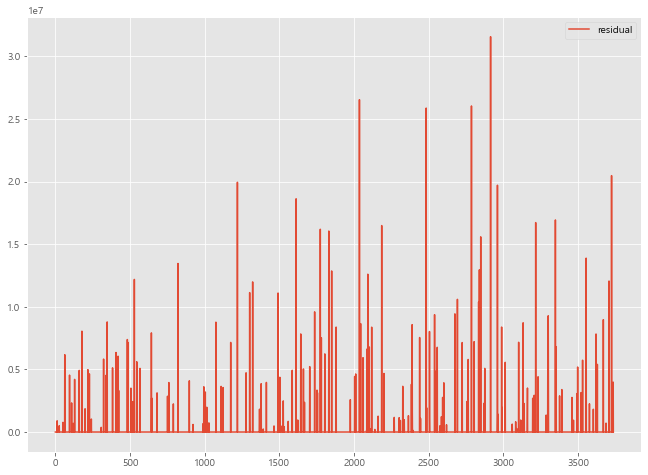

In [9]:
plt.figure(figsize=[11,8])
plt.plot(np.arange(len(test_y)),np.abs((test_y-preds)/test_y),label = 'residual')
plt.legend()
plt.show()

## category값에 좀 더 효과적이라고 알려진 catboost

In [10]:
import catboost as cb 

start = time.time()

cb_dtrain = cb.Pool(data = train_X, label = train_y)
cb_param = {"max_depth":10, # 트리의 깊이 
           "learning_rate":0.01, # Step size
           "n_estimators":500, #Number of trees, 트리의 생성개수 
           "eval_metric":"MAPE",#평가척도
           "loss_function":"MAPE",# 손실함수, 목적함수
            "random_seed":42
           }

cb_model = cb.train(pool=cb_dtrain,params = cb_param)
pred = cb_model.predict(test_X)

0:	learn: 0.9448579	total: 148ms	remaining: 1m 13s
1:	learn: 0.9438966	total: 233ms	remaining: 57.9s
2:	learn: 0.9419080	total: 316ms	remaining: 52.4s
3:	learn: 0.9404571	total: 415ms	remaining: 51.5s
4:	learn: 0.9390653	total: 506ms	remaining: 50.1s
5:	learn: 0.9389763	total: 595ms	remaining: 49s
6:	learn: 0.9381604	total: 686ms	remaining: 48.3s
7:	learn: 0.9366030	total: 775ms	remaining: 47.7s
8:	learn: 0.9345964	total: 862ms	remaining: 47s
9:	learn: 0.9329915	total: 954ms	remaining: 46.7s
10:	learn: 0.9316067	total: 1.05s	remaining: 46.7s
11:	learn: 0.9304252	total: 1.14s	remaining: 46.4s
12:	learn: 0.9293159	total: 1.24s	remaining: 46.5s
13:	learn: 0.9281649	total: 1.32s	remaining: 45.9s
14:	learn: 0.9267137	total: 1.41s	remaining: 45.6s
15:	learn: 0.9255628	total: 1.49s	remaining: 45.1s
16:	learn: 0.9246327	total: 1.58s	remaining: 44.9s
17:	learn: 0.9235322	total: 1.67s	remaining: 44.8s
18:	learn: 0.9232606	total: 1.77s	remaining: 44.8s
19:	learn: 0.9215230	total: 1.86s	remaining:

161:	learn: 0.8597838	total: 12.7s	remaining: 26.6s
162:	learn: 0.8590353	total: 12.8s	remaining: 26.6s
163:	learn: 0.8588937	total: 12.9s	remaining: 26.5s
164:	learn: 0.8586793	total: 13.1s	remaining: 26.5s
165:	learn: 0.8584749	total: 13.1s	remaining: 26.5s
166:	learn: 0.8581687	total: 13.2s	remaining: 26.4s
167:	learn: 0.8578162	total: 13.3s	remaining: 26.3s
168:	learn: 0.8575142	total: 13.4s	remaining: 26.3s
169:	learn: 0.8573718	total: 13.5s	remaining: 26.2s
170:	learn: 0.8571268	total: 13.6s	remaining: 26.2s
171:	learn: 0.8570793	total: 13.7s	remaining: 26.1s
172:	learn: 0.8570042	total: 13.8s	remaining: 26s
173:	learn: 0.8567075	total: 13.9s	remaining: 26s
174:	learn: 0.8565691	total: 13.9s	remaining: 25.9s
175:	learn: 0.8556863	total: 14s	remaining: 25.9s
176:	learn: 0.8551443	total: 14.1s	remaining: 25.8s
177:	learn: 0.8549449	total: 14.2s	remaining: 25.7s
178:	learn: 0.8543335	total: 14.3s	remaining: 25.7s
179:	learn: 0.8541673	total: 14.4s	remaining: 25.6s
180:	learn: 0.8537

322:	learn: 0.8152623	total: 24.1s	remaining: 13.2s
323:	learn: 0.8148136	total: 24.2s	remaining: 13.1s
324:	learn: 0.8145421	total: 24.3s	remaining: 13.1s
325:	learn: 0.8143812	total: 24.3s	remaining: 13s
326:	learn: 0.8143577	total: 24.4s	remaining: 12.9s
327:	learn: 0.8140142	total: 24.5s	remaining: 12.9s
328:	learn: 0.8137938	total: 24.6s	remaining: 12.8s
329:	learn: 0.8136452	total: 24.7s	remaining: 12.7s
330:	learn: 0.8133525	total: 24.8s	remaining: 12.7s
331:	learn: 0.8132260	total: 24.9s	remaining: 12.6s
332:	learn: 0.8129791	total: 25s	remaining: 12.5s
333:	learn: 0.8127699	total: 25.1s	remaining: 12.5s
334:	learn: 0.8125500	total: 25.2s	remaining: 12.4s
335:	learn: 0.8124429	total: 25.2s	remaining: 12.3s
336:	learn: 0.8122834	total: 25.3s	remaining: 12.3s
337:	learn: 0.8120595	total: 25.4s	remaining: 12.2s
338:	learn: 0.8115541	total: 25.5s	remaining: 12.1s
339:	learn: 0.8113071	total: 25.6s	remaining: 12s
340:	learn: 0.8109795	total: 25.7s	remaining: 12s
341:	learn: 0.810902

481:	learn: 0.7857645	total: 34.8s	remaining: 1.3s
482:	learn: 0.7856167	total: 34.9s	remaining: 1.23s
483:	learn: 0.7853786	total: 35s	remaining: 1.16s
484:	learn: 0.7851305	total: 35.1s	remaining: 1.08s
485:	learn: 0.7850881	total: 35.2s	remaining: 1.01s
486:	learn: 0.7850079	total: 35.3s	remaining: 941ms
487:	learn: 0.7848919	total: 35.4s	remaining: 869ms
488:	learn: 0.7846834	total: 35.4s	remaining: 797ms
489:	learn: 0.7843783	total: 35.5s	remaining: 725ms
490:	learn: 0.7841453	total: 35.6s	remaining: 653ms
491:	learn: 0.7837590	total: 35.7s	remaining: 580ms
492:	learn: 0.7836569	total: 35.8s	remaining: 508ms
493:	learn: 0.7835045	total: 35.8s	remaining: 435ms
494:	learn: 0.7834047	total: 35.9s	remaining: 363ms
495:	learn: 0.7832704	total: 36s	remaining: 290ms
496:	learn: 0.7831879	total: 36.1s	remaining: 218ms
497:	learn: 0.7830241	total: 36.2s	remaining: 145ms
498:	learn: 0.7827690	total: 36.3s	remaining: 72.7ms
499:	learn: 0.7827078	total: 36.3s	remaining: 0us


In [11]:
df = pd.DataFrame(cb_model.feature_importances_.reshape(-1,1),index = feature_columns,columns = ["중요도"]).reset_index().sort_values(by = "중요도",ascending =True).set_index("index")
df.iplot(kind="barh")

In [12]:
np.mean(np.abs((test_y-pred)/test_y))

39393.01654691609

In [13]:
np.std(np.abs((test_y-pred)/test_y))

609399.7748524051

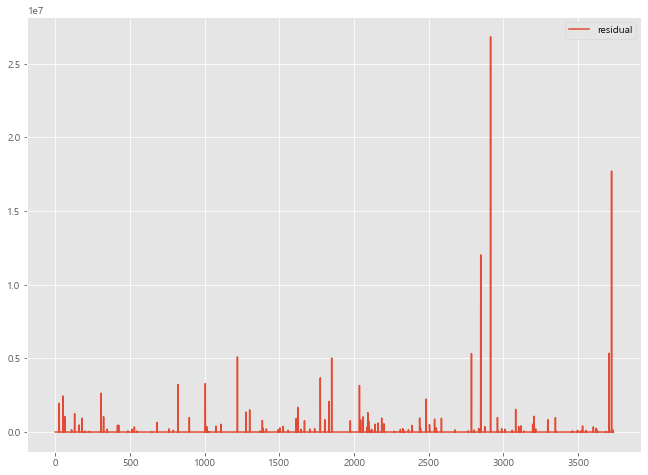

In [14]:
plt.figure(figsize=[11,8])
plt.plot(np.arange(len(test_y)),np.abs((test_y-pred)/test_y),label = 'residual')
plt.legend()
plt.show()

In [15]:
df = pd.DataFrame({"actual":test_y,"pred":pred})
df["mape"] = df["actual"]-df["pred"]

In [16]:
df

,actual,pred,mape
0,10672000,2.466757e+06,8.205243e+06
1,25661000,2.085373e+06,2.357563e+07
2,9550000,3.684998e+06,5.865002e+06
3,9214000,1.965784e+05,9.017422e+06
4,6661000,2.629600e+05,6.398040e+06
...,...,...,...
3732,49758000,2.138181e+06,4.761982e+07
3733,6052000,4.830340e+05,5.568966e+06
3734,19652000,3.422572e+06,1.622943e+07
3735,1,1.279263e+05,-1.279253e+05


In [21]:
sales["취급액"].iplot(kind="histogram")

In [18]:
len(sales[sales["취급액"]==1])/sales.shape[0]

0.05333440376792978